In [1]:
using NPGM, BSpline
using ExpFamilyGM

In [2]:
using PyPlot

INFO: Loading help data...


In [3]:
using Distributions, Cubature

These functions generate functions for BSpline basis.

In [4]:
function createNodeFunction(M, xmin, xmax, numKnots)
   
    bs = BSpline.BSplineT(M, xmin, xmax, numKnots)
    K = BSpline.num_basis(bs)
    
    f_node(x, k)      = BSpline.bspline_basis(k-1, bs, x)
    f_node_der(x, k)  = BSpline.derivative_bspline_basis(k-1, bs, x)
    f_node_der2(x, k) = BSpline.derivative2_bspline_basis(k-1, bs, x)
    
    (f_node, f_node_der, f_node_der2, K)
end

function createEdgeFunction(M, xmin, xmax, numKnots)
   
    bs1 = BSpline.BSplineT(M, xmin[1], xmax[1], numKnots[1])
    bs2 = BSpline.BSplineT(M, xmin[2], xmax[2], numKnots[2])
    L1 = BSpline.num_basis(bs1) 
    L2 = BSpline.num_basis(bs2)
    
    function f_edge(x, y, l) 
        r, c = ind2sub((L1, L2), l)
        r -= 1
        c -= 1
        return BSpline.bspline_basis(r, bs1, x) * BSpline.bspline_basis(c, bs2, y)
    end    
    function f_edge_der(x, y, l, whichArgument) 
        r, c = ind2sub((L1, L2), l)
        r -= 1
        c -= 1
        if whichArgument == 1
            return BSpline.derivative_bspline_basis(r, bs1, x) * BSpline.bspline_basis(c, bs2, y)
        else
            return BSpline.bspline_basis(r, bs1, x) * BSpline.derivative_bspline_basis(c, bs2, y)
        end
    end
    function f_edge_der2(x, y, l, whichArgument) 
        r, c = ind2sub((L1, L2), l)
        r -= 1
        c -= 1
        if whichArgument == 1
            return BSpline.derivative2_bspline_basis(r, bs1, x) * BSpline.bspline_basis(c, bs2, y)
        else
            return BSpline.bspline_basis(r, bs1, x) * BSpline.derivative2_bspline_basis(c, bs2, y)
        end
    end
    
    (f_edge, f_edge_der, f_edge_der2, L1*L2)
end

createEdgeFunction (generic function with 1 method)

# Univariate Gaussian distribution

We first try fitting a well specified model.

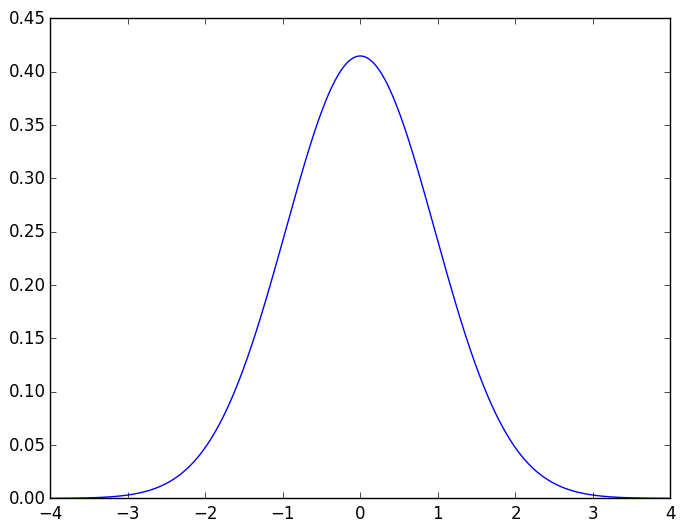

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f56b0a70e90>

In [43]:
n = 1000
X = randn(n,1);

K = 2
L = 1
DD = getDD(X, K, L, gm_node_der_f, gm_edge_der_f)
E = getE(X, K, L, gm_node_der_2_f, gm_edge_der_2_f);

hat_beta = - DD \ E;
testX = linspace(-4, 4, 1000)
psiX = zeros(length(testX), 2)
for i=1:length(testX)
    for j=1:2
        psiX[i, j] = gm_node_f(testX[i], j)
    end
end
f = exp( psiX * hat_beta )
c0 = ExpFamilyGM.trapz(f, -4., 4.)

plot(testX, f/c0);

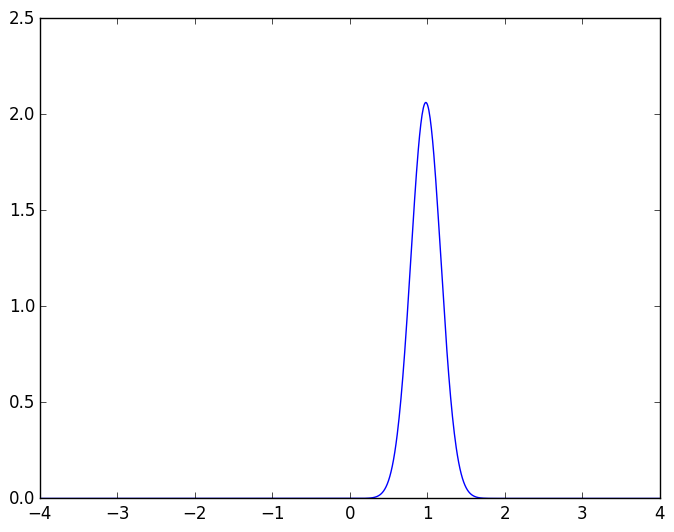

In [44]:
n = 1000
X = randn(n,1)/5 + 1;

K = 2
L = 1
DD = getDD(X, K, L, gm_node_der_f, gm_edge_der_f)
E = getE(X, K, L, gm_node_der_2_f, gm_edge_der_2_f);

hat_beta = - DD \ E;
testX = linspace(-4, 4, 1000)
psiX = zeros(length(testX), 2)
for i=1:length(testX)
    for j=1:2
        psiX[i, j] = gm_node_f(testX[i], j)
    end
end
f = exp( psiX * hat_beta )
c0 = ExpFamilyGM.trapz(f, -4., 4.)

plot(testX, f/c0);

Next, we use BSpline basis

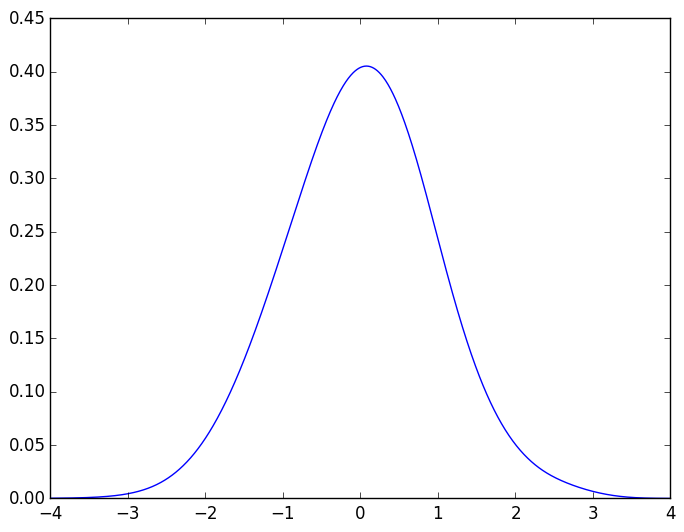

In [52]:
n = 1000
X = randn(n,1);

DD = getDD(X, K, L, phi_node_der, phi_edge_der)
E = getE(X, K, L, phi_node_der2, phi_edge_der2);

hat_beta = - DD \ E;
testX = linspace(-4, 4, 1000)
psiX = zeros(length(testX), K)
for i=1:length(testX)
    for j=1:K
        psiX[i, j] = phi_node(testX[i], j)
    end
end
f = exp( psiX * hat_beta )
c0 = ExpFamilyGM.trapz(f, -4., 4.)

plot(testX, f/c0);

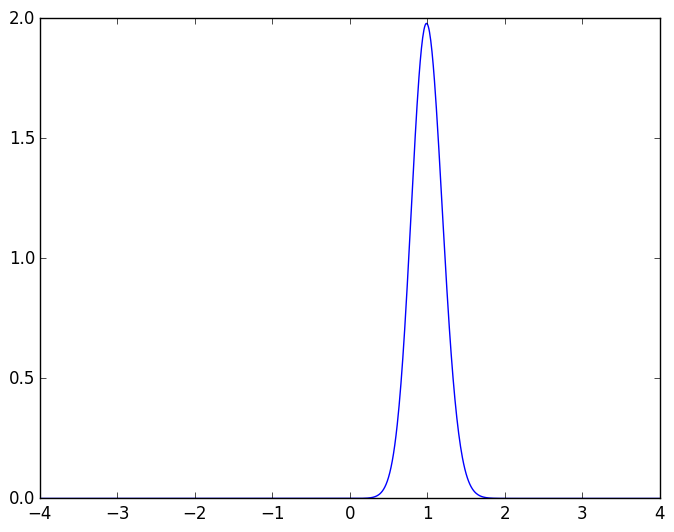

In [55]:
n = 1000
X = randn(n,1)/5 + 1;

DD = getDD(X, K, L, phi_node_der, phi_edge_der)
E = getE(X, K, L, phi_node_der2, phi_edge_der2);

hat_beta = - (DD+1e-12*eye(K)) \ E;
testX = linspace(-4, 4, 1000)
psiX = zeros(length(testX), K)
for i=1:length(testX)
    for j=1:K
        psiX[i, j] = phi_node(testX[i], j)
    end
end
f = exp( psiX * hat_beta )
c0 = ExpFamilyGM.trapz(f, -4., 4.)

plot(testX, f/c0);

# Bivariate densities

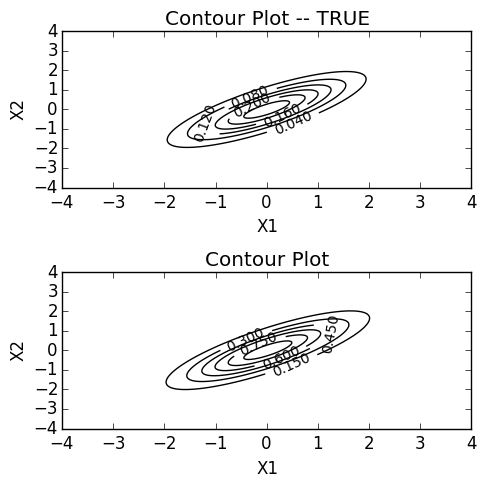

/home/mkolar/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/mkolar/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


In [6]:
n = 1000
p = 2
covM = [1 0.8; 0.8 1]
X = randn(n, p) * sqrtm(covM)

K = 2
L = 1
DD = getDD(X, K, L, gm_node_der_f, gm_edge_der_f)
E = getE(X, K, L, gm_node_der_2_f, gm_edge_der_2_f);

hat_beta = - DD \ E;

function estimF(eval_x)
    exp(gm_node_f(eval_x[1], 1) * hat_beta[1] + 
        gm_node_f(eval_x[1], 2) * hat_beta[2] + 
        gm_node_f(eval_x[2], 1) * hat_beta[3] + 
        gm_node_f(eval_x[2], 2) * hat_beta[4] + 
        gm_edge_f(eval_x[1], eval_x[2], 1) * hat_beta[5])
end
c0, _ = hcubature(estimF, (-4.,-4.), (4.,4.); abstol=1e-4)


numEvalP = 500
X1 = linspace(-4, 4, numEvalP)
X2 = linspace(-4, 4, numEvalP)

xgrid = repmat(X1', numEvalP, 1)
ygrid = repmat(X2,  1, numEvalP)

z = zeros(numEvalP, numEvalP)
for i in 1:numEvalP
    for j in 1:numEvalP
        z[i,j] = estimF([X1[i],X2[j]])
    end
end

mu = zeros(2)
d = MvNormal(mu, covM)
zt = zeros(numEvalP, numEvalP)
for i in 1:numEvalP
    for j in 1:numEvalP
        pt = [X1[i], X2[j]]    
        zt[i,j] = pdf(d, pt)
    end
end


fig = figure("pyplot_surfaceplot",figsize=(5,5))
ax = fig[:add_subplot](2,1,1, ) 
cp = ax[:contour](xgrid, ygrid, zt, colors="black", linewidth=2.0) 
ax[:clabel](cp, inline=1, fontsize=10) 
xlabel("X1") 
ylabel("X2")
title("Contour Plot -- TRUE")

subplot(212) 
ax = fig[:add_subplot](2,1,2) 
cp = ax[:contour](xgrid, ygrid, z, colors="black", linewidth=2.0) 
ax[:clabel](cp, inline=1, fontsize=10) 
xlabel("X1") 
ylabel("X2")
title("Contour Plot")
tight_layout()

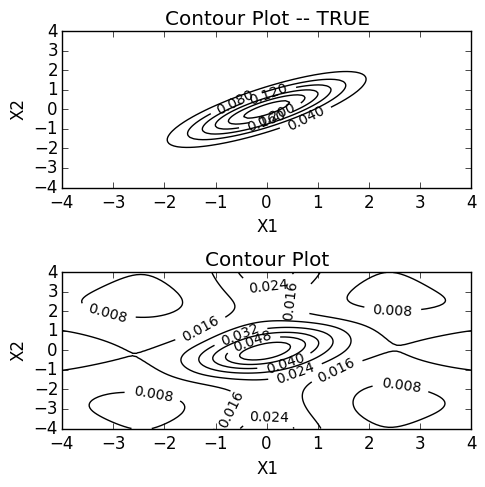

In [7]:
(phi_node, phi_node_der, phi_node_der2, K) = createNodeFunction(4, -4., 4., 10)
(phi_edge, phi_edge_der, phi_edge_der2, L) = createEdgeFunction(4, (-4., -4.), (4., 4.), (10,10))

n = 10000
p = 2
covM = [1 0.8; 0.8 1]
X = randn(n, p) * sqrtm(covM)

DD = getDD(X, K, L, phi_node_der, phi_edge_der)
E = getE(X, K, L, phi_node_der2, phi_edge_der2);

hat_beta = - (DD/n + 1e-1 * eye(2*K+L)) \ (E/n)

function estimF1(eval_x)
    tmp = 0.
    indBeta = 0
    for j=1:p
        for k=1:K
            indBeta += 1
            tmp += phi_node(eval_x[j], k) * hat_beta[indBeta]
        end
    end
    for l=1:L
        indBeta += 1
        tmp += phi_edge(eval_x[1], eval_x[2], l) * hat_beta[indBeta]
    end
    return exp(tmp)
end
c0, _ = hcubature(estimF1, (-4.,-4.), (4.,4.); abstol=1e-4)


numEvalP = 100
X1 = linspace(-4, 4, numEvalP)
X2 = linspace(-4, 4, numEvalP)

xgrid = repmat(X1', numEvalP, 1)
ygrid = repmat(X2,  1, numEvalP)

z = zeros(numEvalP, numEvalP)
for i in 1:numEvalP
    for j in 1:numEvalP
        z[i,j] = estimF1([X1[i],X2[j]]) / c0
    end
end

mu = zeros(2)
d = MvNormal(mu, covM)
zt = zeros(numEvalP, numEvalP)
for i in 1:numEvalP
    for j in 1:numEvalP
        pt = [X1[i], X2[j]]    
        zt[i,j] = pdf(d, pt)
    end
end


fig = figure("pyplot_surfaceplot",figsize=(5,5))
ax = fig[:add_subplot](2,1,1, ) 
cp = ax[:contour](xgrid, ygrid, zt, colors="black", linewidth=2.0) 
ax[:clabel](cp, inline=1, fontsize=10) 
xlabel("X1") 
ylabel("X2")
title("Contour Plot -- TRUE")

subplot(212) 
ax = fig[:add_subplot](2,1,2) 
cp = ax[:contour](xgrid, ygrid, z, colors="black", linewidth=2.0) 
ax[:clabel](cp, inline=1, fontsize=10) 
xlabel("X1") 
ylabel("X2")
title("Contour Plot")
tight_layout()

# 3-dim Gaussian, plotting conditional $X_1\mid X_2,X_3$

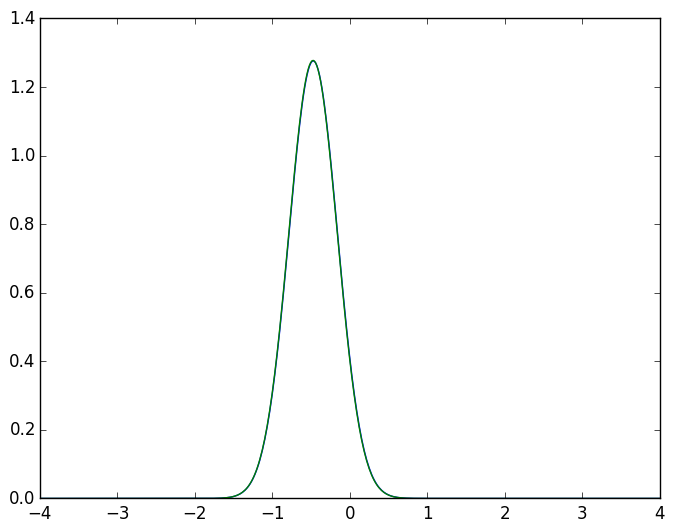

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43b3e93910>

In [9]:
n = 10000
p = 3
covM = [1 0.95 0; 0.95 1 0; 0 0 1]
X = randn(n, p) * sqrtm(covM)

K = 2
L = 1
DD = getDD(X, K, L, gm_node_der_f, gm_edge_der_f)
E = getE(X, K, L, gm_node_der_2_f, gm_edge_der_2_f);

hat_beta = - DD \ E;

function estimF3(x)
    tmp = 0.
    for a=1:p
        for k=1:K
            tmp += gm_node_f(x[a], k) * hat_beta[(a-1)*K+k]
        end
    end
    indEdge = 0
    for a=1:p
        for b=a+1:p
            indEdge += 1
            for l=1:L
                tmp += gm_edge_f(x[a], x[b], l) * hat_beta[K*p + (indEdge-1)*L + l]    
            end
        end
    end
    exp(tmp)
end

x0 = [-0.5 0]

numEvalP = 500
X1 = linspace(-4, 4, numEvalP)
f = (eltype(Float64))[estimF3([x, x0[1], x0[2]]) for x in X1]
c0 = ExpFamilyGM.trapz(f, -4., 4.)

plot(X1, f/c0)

mu = zeros(3)
d = MvNormal(mu, covM)
ft = (eltype(Float64))[pdf(d, [x, x0[1], x0[2]]) for x in X1]
c0t = ExpFamilyGM.trapz(ft, -4., 4.)

plot(X1, ft/c0t)


In [305]:
(phi_node, phi_node_der, phi_node_der2, K) = createNodeFunction(4, -4., 4., 5)
(phi_edge, phi_edge_der, phi_edge_der2, L) = createEdgeFunction(4, (-4., -4.), (4., 4.), (2,2))

n = 200
p = 3
covM = [1 0.95 0; 0.95 1 0; 0 0 1]
X = randn(n, p) * sqrtm(covM)

DD = getDD(X, K, L, phi_node_der, phi_edge_der)
E = getE(X, K, L, phi_node_der2, phi_edge_der2);
U, D, Vt = svd(full(DD) / n)
indC = findfirst((x) -> x < 1e-5, D)
D[indC:end] = 0
for j=1:indC-1
    D[j] = 1. / D[j]
end
@time hat_beta = - Vt * diagm(D) * U' * E / n;

elapsed time: 0.037817672 seconds (197528 bytes allocated, 99.52% gc time)


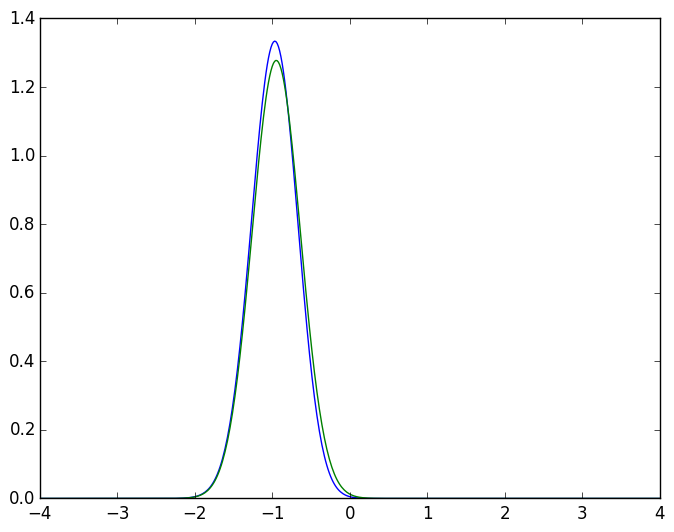

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43ae5fbdd0>

In [306]:
function estimF(x)
    tmp = 0.
    for a=1:p
        for k=1:K
            tmp += phi_node(x[a], k) * hat_beta[(a-1)*K+k]
        end
    end
    indEdge = 0
    for a=1:p
        for b=a+1:p
            indEdge += 1
            for l=1:L
                tmp += phi_edge(x[a], x[b], l) * hat_beta[K*p + (indEdge-1)*L + l]    
            end
        end
    end
    exp(tmp)
end

x0 = [-1 0]

lb = -4.
ub = 4.
numEvalP = 500
X1 = linspace(lb, ub, numEvalP)
f = (eltype(Float64))[estimF([x, x0[1], x0[2]]) for x in X1]
c0 = ExpFamilyGM.trapz(f, lb, ub)

plot(X1, f/c0)

mu = zeros(3)
d = MvNormal(mu, covM)
ft = (eltype(Float64))[pdf(d, [x, x0[1], x0[2]]) for x in X1]
c0t = ExpFamilyGM.trapz(ft, lb, ub)

plot(X1, ft/c0t)

In [298]:
hat_beta'

1x69 Array{Float64,2}:
 -0.161493  -3.29843  1.7417  4.11042  …  -0.445744  0.0675045  0.034853

In [89]:
(K,L)

(7,16)

In [268]:
U[:,1:indC]'*Vt[1:indC,:]

26x26 Array{Float64,2}:
  1.0          -2.10584e-16   1.05806e-16  …  -6.36525e-17  -2.28917e-19
 -2.10584e-16   1.0           7.28448e-16      1.85427e-17   3.63399e-17
  1.05806e-16   7.28448e-16   1.0             -2.09943e-17  -6.58719e-17
  1.06745e-17  -1.76047e-16  -4.32617e-17      1.16364e-17   2.35682e-17
 -2.12537e-16   1.73969e-16   2.77328e-16      2.16628e-17  -4.44865e-17
  4.46601e-16   7.08859e-17   1.31235e-17  …  -4.1336e-17    2.70083e-17
  2.1815e-17    2.11759e-16   2.38769e-16     -5.08501e-17  -2.49568e-17
  2.57338e-16   9.50733e-17   9.44337e-17      2.80729e-17  -2.53424e-19
  6.53803e-17  -5.39916e-17  -6.47245e-17      1.1832e-16    1.06194e-18
 -5.63083e-17  -1.53752e-16  -1.44698e-16      6.56772e-17  -1.27418e-17
 -2.18505e-16  -1.44788e-16   1.6122e-16   …   1.82529e-17   5.00169e-17
 -1.66535e-17  -3.7216e-17   -8.36432e-17     -4.00511e-17   9.71219e-18
  1.3005e-16    8.72541e-17   2.14608e-17      6.97373e-17  -4.17208e-17
  1.4483e-16    2.36021e-17

In [275]:
indC

26

In [276]:
U*diagm(D)*Vt' - DD

69x69 Array{Float64,2}:
 -0.0527515     0.0126182     0.0432641    …   8.51766e-16   2.30254e-16
  0.0126182     0.56444       0.319648        -4.53403e-16   1.38869e-17
  0.0432641     0.319648     -1.41599         -7.35122e-16  -4.0236e-17 
 -0.00313079   -0.884006     -0.0372907       -1.83292e-17   6.63732e-17
  3.63197e-17  -0.0127004     1.16744         -2.81659e-16  -6.56847e-17
 -3.70307e-17   1.72204e-15  -0.0770661    …  -6.69228e-16  -2.28627e-16
 -8.33989e-18  -1.86842e-16   4.28239e-16     -1.60638e-15  -6.29616e-16
 -3.49099e-18   1.6913e-16    3.69878e-16      0.00132945    2.82173e-6 
 -2.40972e-17  -1.81873e-15   2.05687e-15     -0.000793393   0.000130938
  1.04517e-16   1.61441e-14   1.52705e-14      0.0111297     0.000115526
  2.08294e-16   1.75579e-14  -5.4091e-15   …  -0.0301701    -0.00518955 
 -2.40503e-16  -2.71093e-14  -4.44153e-15      0.021607      0.00881363 
 -3.72941e-17  -5.09873e-15  -2.52648e-15     -0.00300078   -0.00403815 
  ⋮                        

# How well BSpline approximate x*y function

In [82]:
N = 100
t1 = rand(Uniform(-4, 4), N)
t2 = rand(Uniform(-4, 4), N)
nX = zeros(N, L)
nY = zeros(N)
for i=1:N
    for j=1:L
        nX[i,j] = phi_edge(t1[i], t2[i], j)
    end
    nY[i] = t1[i] * t2[i]
end

In [83]:
hb = nX \ nY

numEvalP = 200
X1 = linspace(-4, 4, numEvalP)
X2 = linspace(-4, 4, numEvalP)
xgrid = repmat(X1', numEvalP, 1)
ygrid = repmat(X2,  1, numEvalP)

function f1(x,y) 
    tmp = 0.
    for j=1:L
        tmp += phi_edge(x, y, j) * hb[j]
    end
    tmp
end
z = zeros(numEvalP, numEvalP)
for i in 1:numEvalP
    for j in 1:numEvalP
        z[i,j] = f1(X1[i],X2[j]) 
    end
end
zt = zeros(numEvalP, numEvalP)
for i in 1:numEvalP
    for j in 1:numEvalP
        zt[i,j] = X1[i] * X2[j]
    end
end



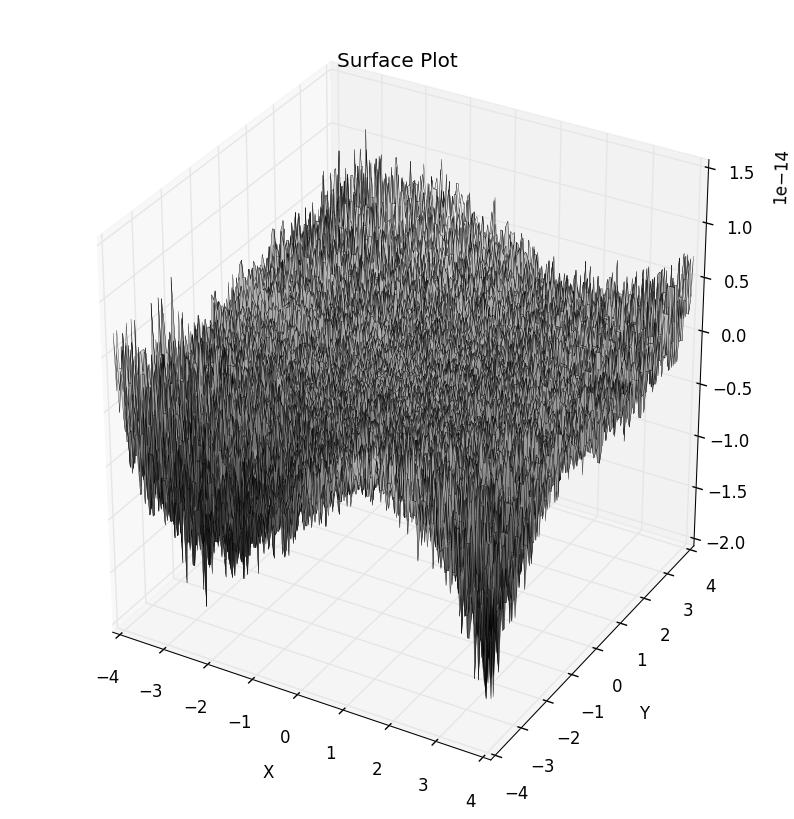

PyObject <matplotlib.text.Text object at 0x7f43b26c0610>

In [84]:

fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](1,1,1, projection = "3d")
ax[:plot_surface](xgrid, ygrid, zt-z, rstride=2, edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
xlabel("X")
ylabel("Y")
title("Surface Plot")
